In [22]:
import pandas as pd
import geopandas as gpd
import numpy as np

from tqdm import tqdm_pandas
from tqdm.notebook import tqdm as nbtqdm
nbtqdm.pandas()

from shapely.geometry import Point, Polygon
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [113]:
# roads information
roads = pd.read_csv('Data/PHILADELPHIA_2001/ROADWAY_PHILADELPHIA_2001.csv')

# crash data
crashes = pd.read_csv('Data/PHILADELPHIA_2001/CRASH_PHILADELPHIA_2001.csv',low_memory=False)
crashes = crashes.loc[(-crashes.DEC_LAT.isnull()) & (-crashes.DEC_LONG.isnull())]

# roads json
geoData = gpd.read_file('Data/CompleteStreets.geojson')

# remove highways (optional)
crashes = crashes.loc[crashes.CRN.isin(roads.loc[roads.ROAD_OWNER >= 3,'CRN'].values)]



In [118]:
crashes

,ARRIVAL_TM,AUTOMOBILE_COUNT,BELTED_DEATH_COUNT,BELTED_SUSP_SERIOUS_INJ_COUNT,BICYCLE_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_SUSP_SERIOUS_INJ_COUNT,BUS_COUNT,CHLDPAS_DEATH_COUNT,CHLDPAS_SUSP_SERIOUS_INJ_COUNT,...,WZ_OTHER,WZ_SHLDER_MDN,ROADWAY_CLEARED,WEATHER1,WEATHER2,WZ_WORKERS_INJ_KILLED,SECONDARY_CRASH,INTERSECTION_RELATED,point,intersecting_roads
1,250.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.11815 40.0208, -75.1181507222910...","[640377, 640383, 640550, 640378]"
2,937.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.20585 39.9576, -75.205850722291 ...","[420873, 420842, 420839, 422608]"
3,1710.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.18365 39.9533, -75.1836507222910...","[421989, 421925, 421975, 423240]"
4,2102.0,2,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.19685 39.9596, -75.196850722291 ...","[422139, 422142, 420761, 420762]"
6,9999.0,1,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,7,,NaN,NaN,NaN,"POLYGON ((-75.16735 40.0562, -75.167350722291 ...","[721149, 721150, 721791]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9814,1617.0,1,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.21865 40.0226, -75.218650722291 ...",[600364]
9815,1533.0,4,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.10655 40.0413, -75.106550722291 ...","[740565, 740602, 740564, 742829]"
9816,1152.0,3,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.12824999999999 40.0189, -75.1282...","[640619, 640628, 642613]"
9817,1224.0,1,0,0,0,0,0,1,0,0,...,NaN,NaN,NaN,3,,NaN,NaN,NaN,"POLYGON ((-75.17874999999999 40.059, -75.17875...","[720627, 720624, 720677, 720658]"


In [120]:
# # make a geoData point for each crash
# crashes['point'] = crashes.apply(lambda x: Point(x.DEC_LONG,x.DEC_LAT).buffer(0.00015),1)

# crashes['intersecting_roads'] = crashes.point.progress_apply(lambda x: geoData.loc[geoData.geometry.intersects(x),'SEG_ID'].values)

Expanded_DF = []
def expand_segments(row):
    Point = row.point
    for seg in row['intersecting_roads']:
        c_row = row.copy()
        c_row['SEG_ID'] = seg
        Expanded_DF.append(c_row)
        
crashes.apply(expand_segments,1)
exp_df = pd.DataFrame(Expanded_DF)
exp_df = exp_df.groupby('SEG_ID',as_index=False).ARRIVAL_TM.count()
exp_df = exp_df.merge(geoData,on='SEG_ID',how='outer')
exp_df = exp_df[['SEG_ID','ARRIVAL_TM','geometry']]
exp_df.columns = ['SEG_ID','Crashes','geometry']
exp_df['ARRIVAL_TM'] = exp_df.Crashes.fillna(0)
exp_df['percent'] = exp_df.Crashes/exp_df.Crashes.sum()


<AxesSubplot:>

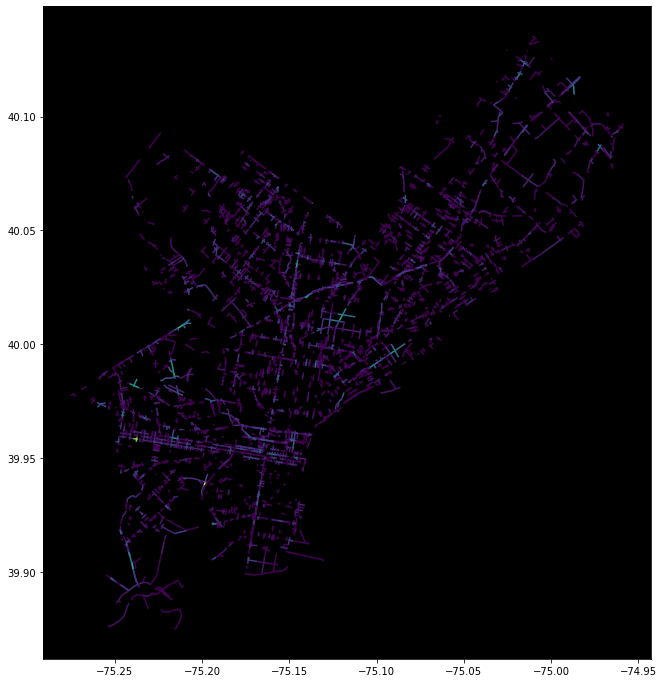

In [122]:
fig, ax = plt.subplots(1, 1,figsize=(12,12))
ax.set_facecolor("black")
gpd.GeoDataFrame(exp_df).plot(ax=ax,column='Crashes')

In [119]:
Expanded_DF

[]